In [1]:
#run this first!
library(tidyverse)
library(tidymodels)
library(repr)
library(cowplot)
options(repr.matrix.max.rows=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Project Proposal

### Preliminary Exploratory Data Analysis


Firstly, we read two datasets(processed.cleveland.data&reprocessed.hungarian.data) directly from the web, gave every column a specific header name, selected the columns we are interested in, and converted every column into the correct and most appropriate data type. Then, all of the datasets are in a tidy format. 

Secondly, we split every dataset into a training set and a testing set with strata = num, ensuring that roughly the same proportion of 0 and 1(0 means no diagnosis; 1 means diagnosed) ends up in both training and testing sets. In the following steps, we will only analyze, summarize, and visualize the training sets of the two datasets.

In [2]:
set.seed(18)
con_names1<-c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang", "oldpeak","slope","ca","thal","num")
heart_cleaveland<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = con_names1)

cleaveland_mutate<-heart_cleaveland|>
filter(num==0|num==1)|>
select(age,sex,cp,trestbps,chol,thalach,oldpeak,num)|>
mutate(age=as.integer(age))|>
mutate(num=as.factor(num))|>
mutate(cp=as.factor(cp))|>
mutate(sex=as.factor(sex))|>
mutate(trestbps=as.double(trestbps))|>
mutate(thalach=as.double(thalach))|>
mutate(oldpeak=as.double(oldpeak))

cleaveland_split <- initial_split(cleaveland_mutate, prop = 0.75, strata = num)
cleaveland_training <- training(cleaveland_split)
cleaveland_testing <- testing(cleaveland_split)

cleaveland_training

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,thalach,oldpeak,num
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,150,2.3,0
37,1,3,130,250,187,3.5,0
41,0,2,130,204,172,1.4,0
56,1,2,120,236,178,0.8,0
57,0,4,120,354,163,0.6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
67,1,3,152,212,150,0.8,1
63,0,4,124,197,136,0.0,1
57,0,4,140,241,123,0.2,1


In [3]:
set.seed(18)
heart_hungarian <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data",delim=" ", 
                              col_names = con_names1)
hungarian_mutate <- heart_hungarian|>
filter(num==0|num==1)|>
select(age,sex,cp,trestbps,chol,thalach,oldpeak,num)|>
mutate(age=as.integer(age))|>
mutate(num=as.factor(num))|>
mutate(cp=as.factor(cp))|>
mutate(sex=as.factor(sex))|>
mutate(trestbps=as.double(trestbps))|>
mutate(thalach=as.double(thalach))|>
mutate(oldpeak=as.double(oldpeak))



hungarian_split <- initial_split(hungarian_mutate, prop = 0.75, strata = num)
hungarian_training <- training(hungarian_split)
hungarian_testing <- testing(hungarian_split)

hungarian_training


Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,thalach,oldpeak,num
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,1,2,140,289,172,0,0
37,1,2,130,283,98,0,0
54,1,3,150,-9,122,0,0
39,1,3,120,339,170,0,0
45,0,2,130,237,170,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
50,1,4,145,264,150,0.0,1
38,1,4,92,117,134,2.5,1
48,1,4,160,268,103,1.0,1


-------------------------------------------------------------------------------------------------------------------------------

### Summary of the five potential numerical variables for the two heart disease training datasets from Cleveland and Hungarian.

We summarized the five potential numerical predictors(age, trestbps, chol, thalach, & oldpeak). We obtained means, maximums, and minimums and made them into tables. Each training dataset has two tables: one is summarized based on the whole dataset, and another one is summarized based on the part of the dataset filtered by num=1(i.e.diagnosed data).

In [4]:
cleaveland_5predictors_all_summary<-summarize(cleaveland_training,
                                        age_max=max(age,na.rm=TRUE),
                                        age_min=min(age,na.rm=TRUE),
                                        age_mean=mean(age,na.rm=TRUE),
                                        trestbps_max=max(trestbps,na.rm=TRUE),
                                        trestbps_min=min(trestbps,na.rm=TRUE),
                                        trestbps_mean=mean(trestbps,na.rm=TRUE),
                                        chol_max=max(chol,na.rm=TRUE),
                                        chol_min=min(chol,na.rm=TRUE),
                                        chol_mean=mean(chol,na.rm=TRUE),
                                        thalach_max=max(thalach,na.rm=TRUE),
                                        thalach_min=min(thalach,na.rm=TRUE),
                                        thalach_mean=mean(thalach,na.rm=TRUE),
                                        oldpeak_max=max(oldpeak,na.rm=TRUE),
                                        oldpeak_min=min(oldpeak,na.rm=TRUE),
                                        oldpeak_mean=mean(oldpeak,na.rm=TRUE))

cleaveland_5predictors_diagnosed_summary<-summarize(cleaveland_training|>filter(num==1),
                                        age_max=max(age,na.rm=TRUE),
                                        age_min=min(age,na.rm=TRUE),
                                        age_mean=mean(age,na.rm=TRUE),
                                        trestbps_max=max(trestbps,na.rm=TRUE),
                                        trestbps_min=min(trestbps,na.rm=TRUE),
                                        trestbps_mean=mean(trestbps,na.rm=TRUE),
                                        chol_max=max(chol,na.rm=TRUE),
                                        chol_min=min(chol,na.rm=TRUE),
                                        chol_mean=mean(chol,na.rm=TRUE),
                                        thalach_max=max(thalach,na.rm=TRUE),
                                        thalach_min=min(thalach,na.rm=TRUE),
                                        thalach_mean=mean(thalach,na.rm=TRUE),
                                        oldpeak_max=max(oldpeak,na.rm=TRUE),
                                        oldpeak_min=min(oldpeak,na.rm=TRUE),
                                        oldpeak_mean=mean(oldpeak,na.rm=TRUE))

In [5]:
hungarian_5predictors_all_summary<-summarize(hungarian_training,
                                       age_max=max(age,na.rm=TRUE),
                                        age_min=min(age,na.rm=TRUE),
                                        age_mean=mean(age,na.rm=TRUE),
                                        trestbps_max=max(trestbps,na.rm=TRUE),
                                        trestbps_min=min(trestbps,na.rm=TRUE),
                                        trestbps_mean=mean(trestbps,na.rm=TRUE),
                                        chol_max=max(chol,na.rm=TRUE),
                                        chol_min=min(chol,na.rm=TRUE),
                                        chol_mean=mean(chol,na.rm=TRUE),
                                        thalach_max=max(thalach,na.rm=TRUE),
                                        thalach_min=min(thalach,na.rm=TRUE),
                                        thalach_mean=mean(thalach,na.rm=TRUE),
                                        oldpeak_max=max(oldpeak,na.rm=TRUE),
                                        oldpeak_min=min(oldpeak,na.rm=TRUE),
                                        oldpeak_mean=mean(oldpeak,na.rm=TRUE))

hungarian_5predictors_diagnosed_summary<-summarize(hungarian_training|>filter(num==1),
                                      age_max=max(age,na.rm=TRUE),
                                        age_min=min(age,na.rm=TRUE),
                                        age_mean=mean(age,na.rm=TRUE),
                                        trestbps_max=max(trestbps,na.rm=TRUE),
                                        trestbps_min=min(trestbps,na.rm=TRUE),
                                        trestbps_mean=mean(trestbps,na.rm=TRUE),
                                        chol_max=max(chol,na.rm=TRUE),
                                        chol_min=min(chol,na.rm=TRUE),
                                        chol_mean=mean(chol,na.rm=TRUE),
                                        thalach_max=max(thalach,na.rm=TRUE),
                                        thalach_min=min(thalach,na.rm=TRUE),
                                        thalach_mean=mean(thalach,na.rm=TRUE),
                                        oldpeak_max=max(oldpeak,na.rm=TRUE),
                                        oldpeak_min=min(oldpeak,na.rm=TRUE),
                                        oldpeak_mean=mean(oldpeak,na.rm=TRUE))

In [6]:
cleaveland_5predictors_all_summary

age_max,age_min,age_mean,trestbps_max,trestbps_min,trestbps_mean,chol_max,chol_min,chol_mean,thalach_max,thalach_min,thalach_mean,oldpeak_max,oldpeak_min,oldpeak_mean
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76,29,52.55488,192,94,130.372,417,157,246,202,88,156.7927,4.2,0,0.6743902


In [7]:
hungarian_5predictors_all_summary

age_max,age_min,age_mean,trestbps_max,trestbps_min,trestbps_mean,chol_max,chol_min,chol_mean,thalach_max,thalach_min,thalach_mean,oldpeak_max,oldpeak_min,oldpeak_mean
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65,28,46.94643,190,-9,130.8571,466,-9,220.5357,190,-9,143.375,3,0,0.2857143


The two tables above seem to have no significant differences in comparisons for each statistic except for some extreme values(such as the chol_min and the thalach_min from Hungarian). 

In [8]:
cleaveland_5predictors_diagnosed_summary

age_max,age_min,age_mean,trestbps_max,trestbps_min,trestbps_mean,chol_max,chol_min,chol_mean,thalach_max,thalach_min,thalach_mean,oldpeak_max,oldpeak_min,oldpeak_mean
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
70,35,55.39024,192,108,134.1951,335,172,251.2195,195,88,146.6585,3.6,0,0.9121951


In [9]:
hungarian_5predictors_diagnosed_summary

age_max,age_min,age_mean,trestbps_max,trestbps_min,trestbps_mean,chol_max,chol_min,chol_mean,thalach_max,thalach_min,thalach_mean,oldpeak_max,oldpeak_min,oldpeak_mean
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65,31,46.92593,160,92,129.1111,466,117,242.8519,180,87,139.6296,3,0,0.9074074


Looking at all four tables above, there are some slight differences, but we still cannot obtain any meaningful conclusions; maybe we can discover something later. Let's move to the visualizations. 

-------------------------------------------------------------------------------------------------------------------------------

### Visualizations of the seven potential predictor variables for Cleaveland and Hungarian

Two of the seven potential variables are categorical(cp&sex), and the other five are numerical(age, trestbps, chol, thalach,& oldpeak). Although categorical variables are not appropriate for building classifiers, they can help show differences in the distributions of variables in the two regions if differences exist. Making bar plots is an excellent way to show the distributions of categorical variables, and making histograms is the most appropriate way for numerical variables, so we did!

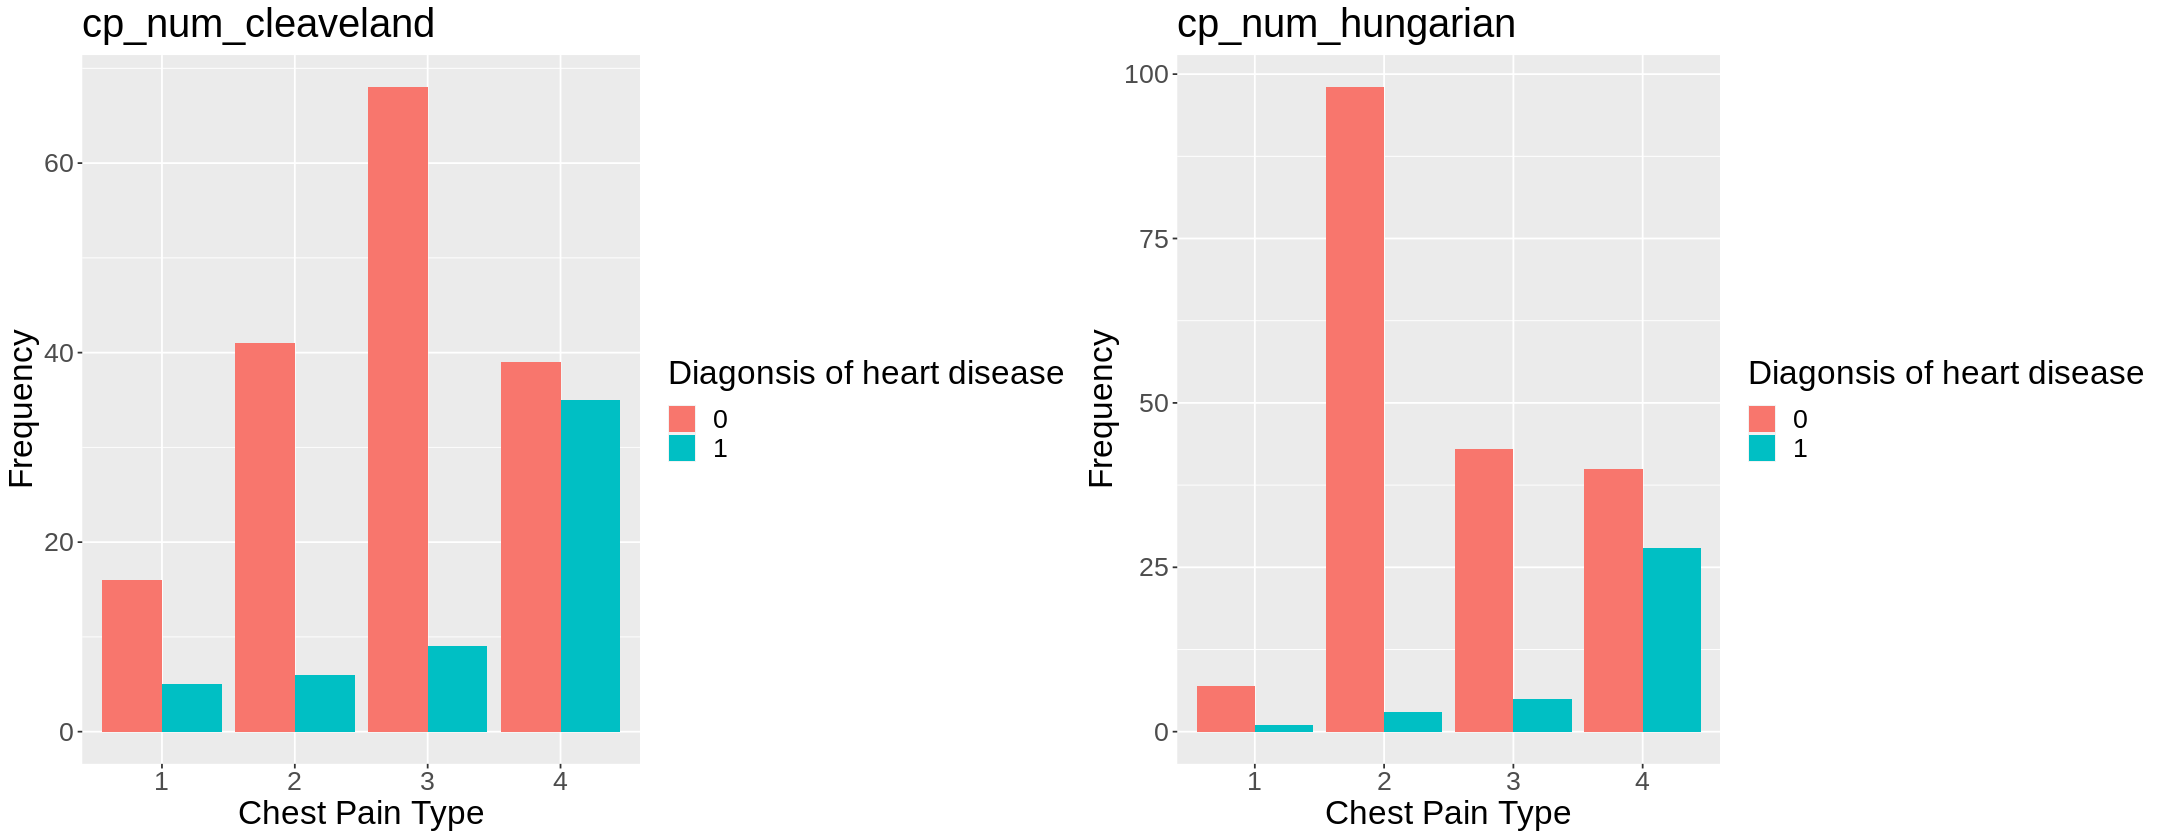

In [143]:
options(repr.plot.width=18, repr.plot.height=7)
cp_num_cleaveland<-cleaveland_mutate|>
ggplot(aes(x=cp,fill= num))+
geom_bar(position="dodge")+
labs(x="Chest Pain Type",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("cp_num_cleaveland")+
theme(text=element_text(size=20))


cp_num_hungarian<-hungarian_mutate|>
ggplot(aes(x=cp,fill= num))+
geom_bar(position="dodge")+
labs(x="Chest Pain Type",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("cp_num_hungarian")+
theme(text=element_text(size=20))

#Compares cp frequency for 2 regions
plot_grid(cp_num_cleaveland, cp_num_hungarian, ncol = 2)

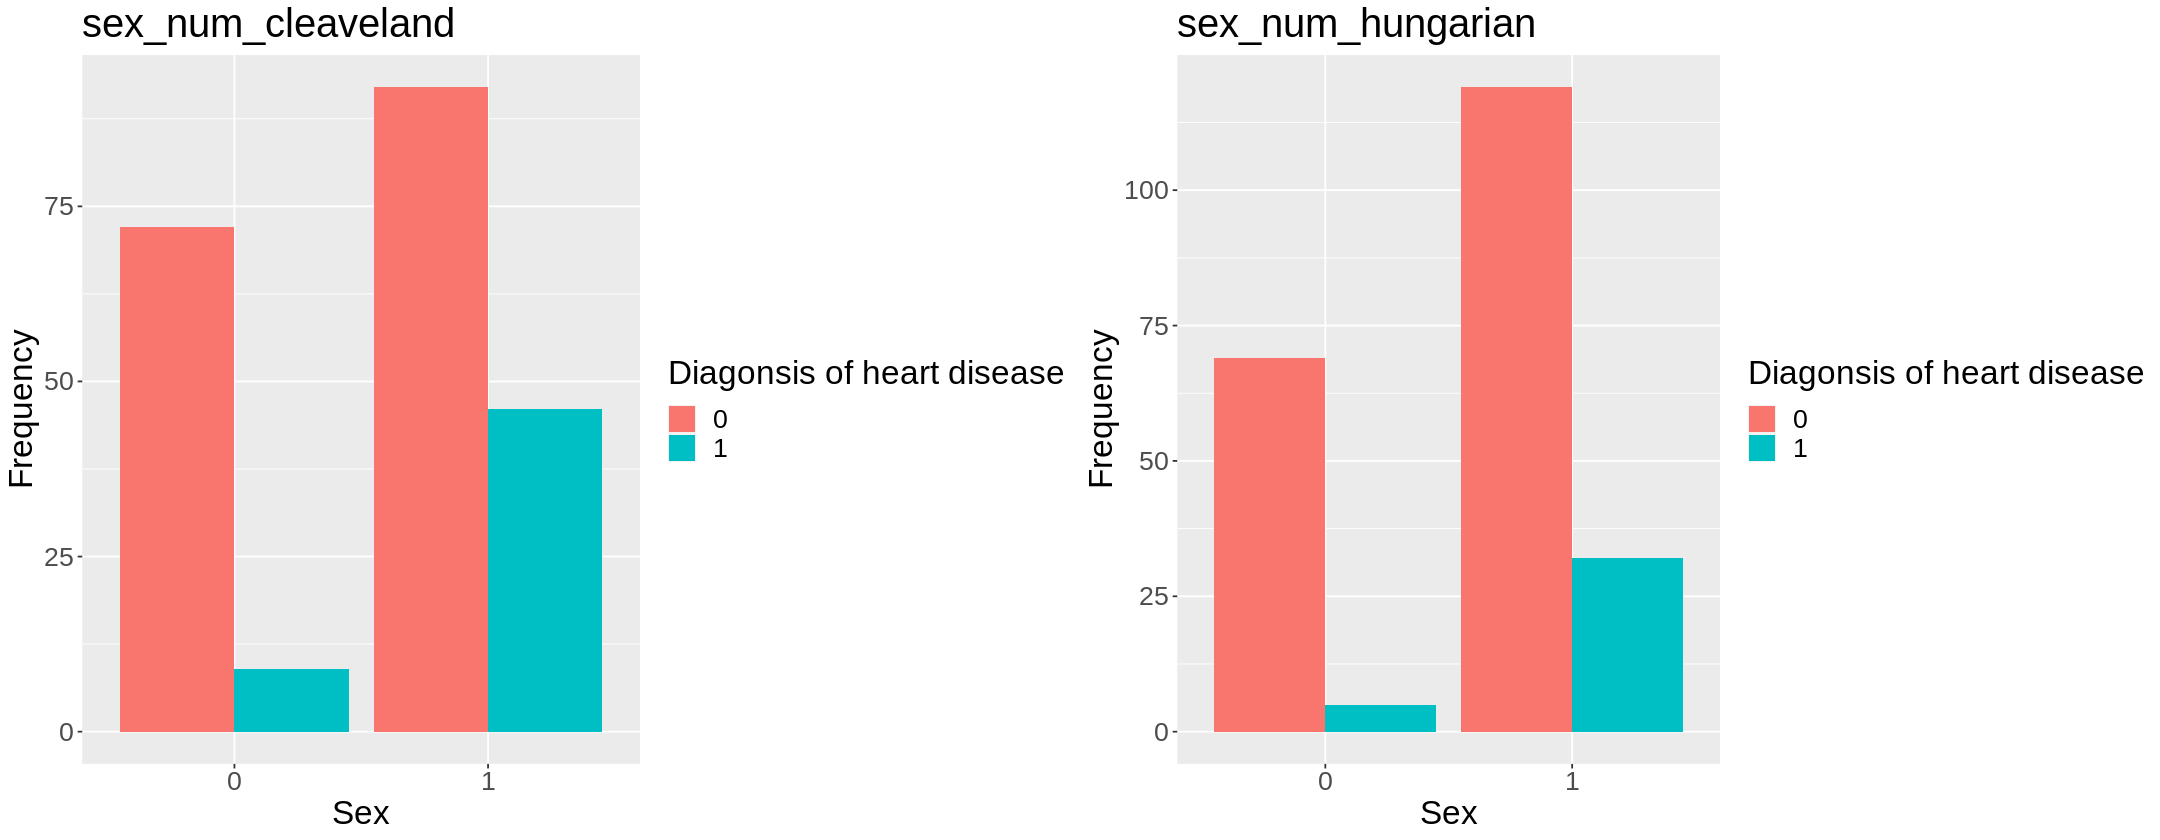

In [111]:
options(repr.plot.width=18, repr.plot.height=7)
sex_num_cleaveland<-cleaveland_mutate|>
ggplot(aes(x=sex,fill= num))+
geom_bar(position="dodge")+
labs(x="Sex",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("sex_num_cleaveland")+
theme(text=element_text(size=20))


sex_num_hungarian<-hungarian_mutate|>
ggplot(aes(x=sex,fill= num))+
geom_bar(position="dodge")+
labs(x="Sex",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("sex_num_hungarian")+
theme(text=element_text(size=20))

#Compares sex frequency for 2 regions
plot_grid(sex_num_cleaveland, sex_num_hungarian, ncol = 2)

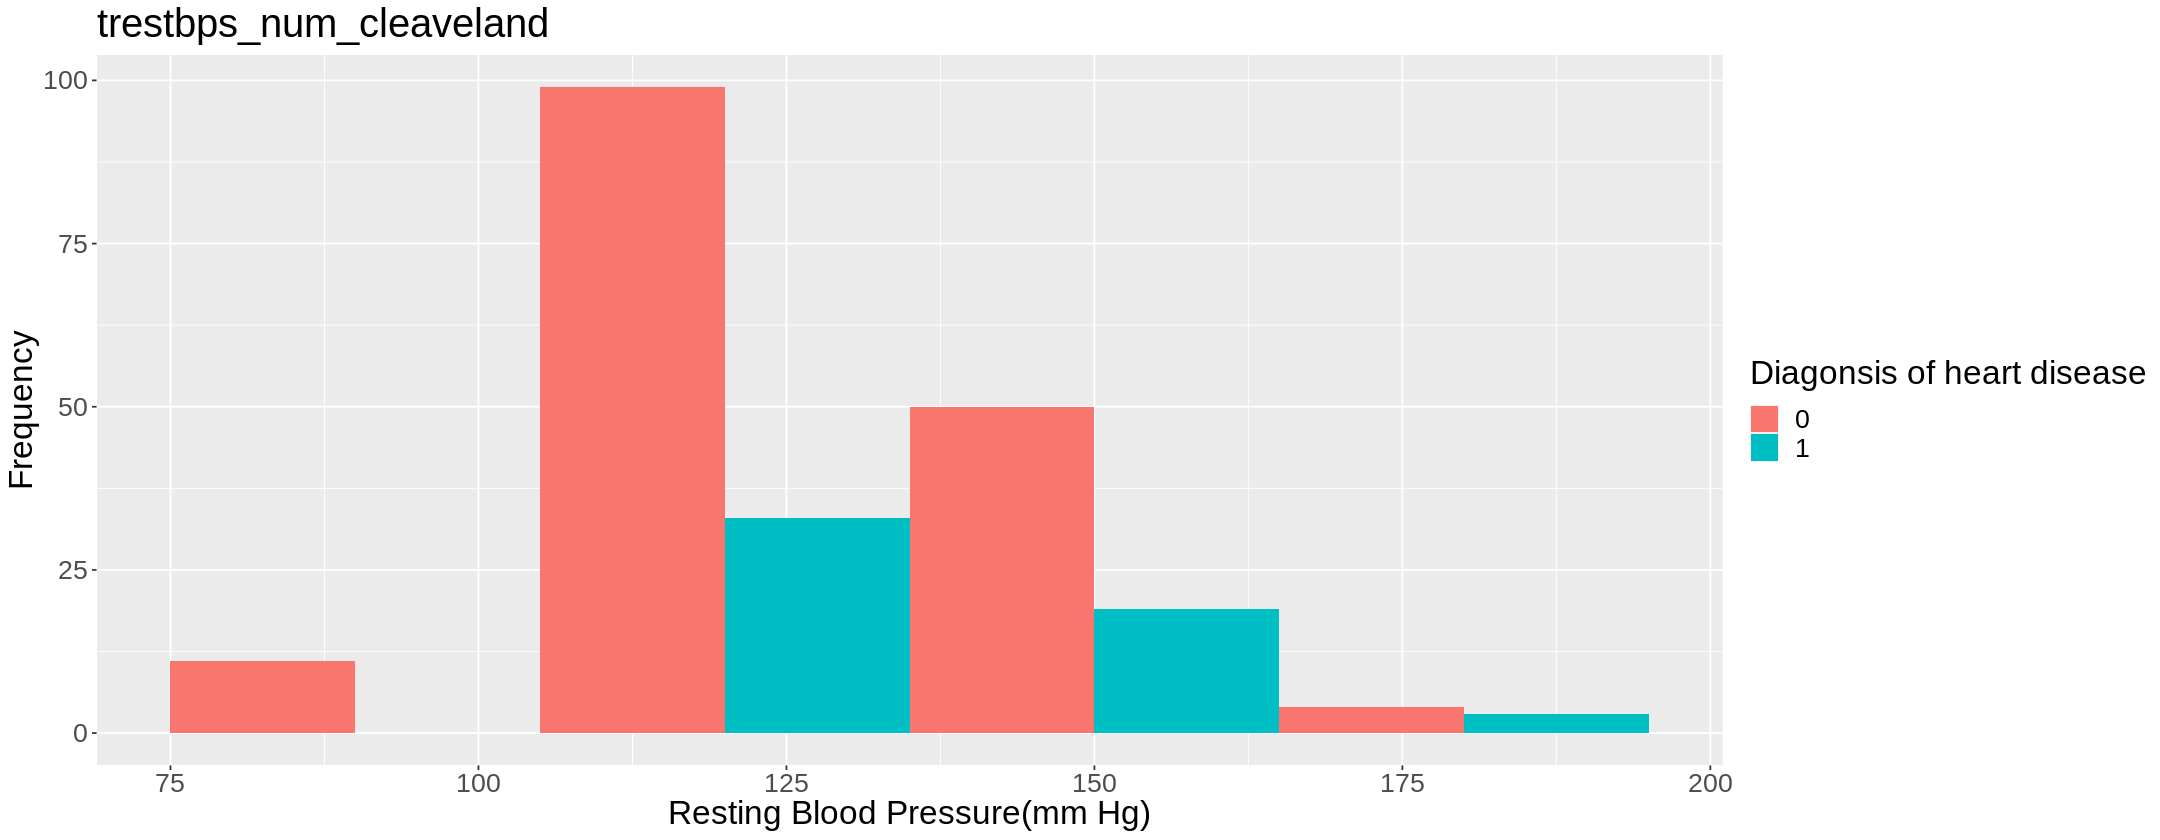

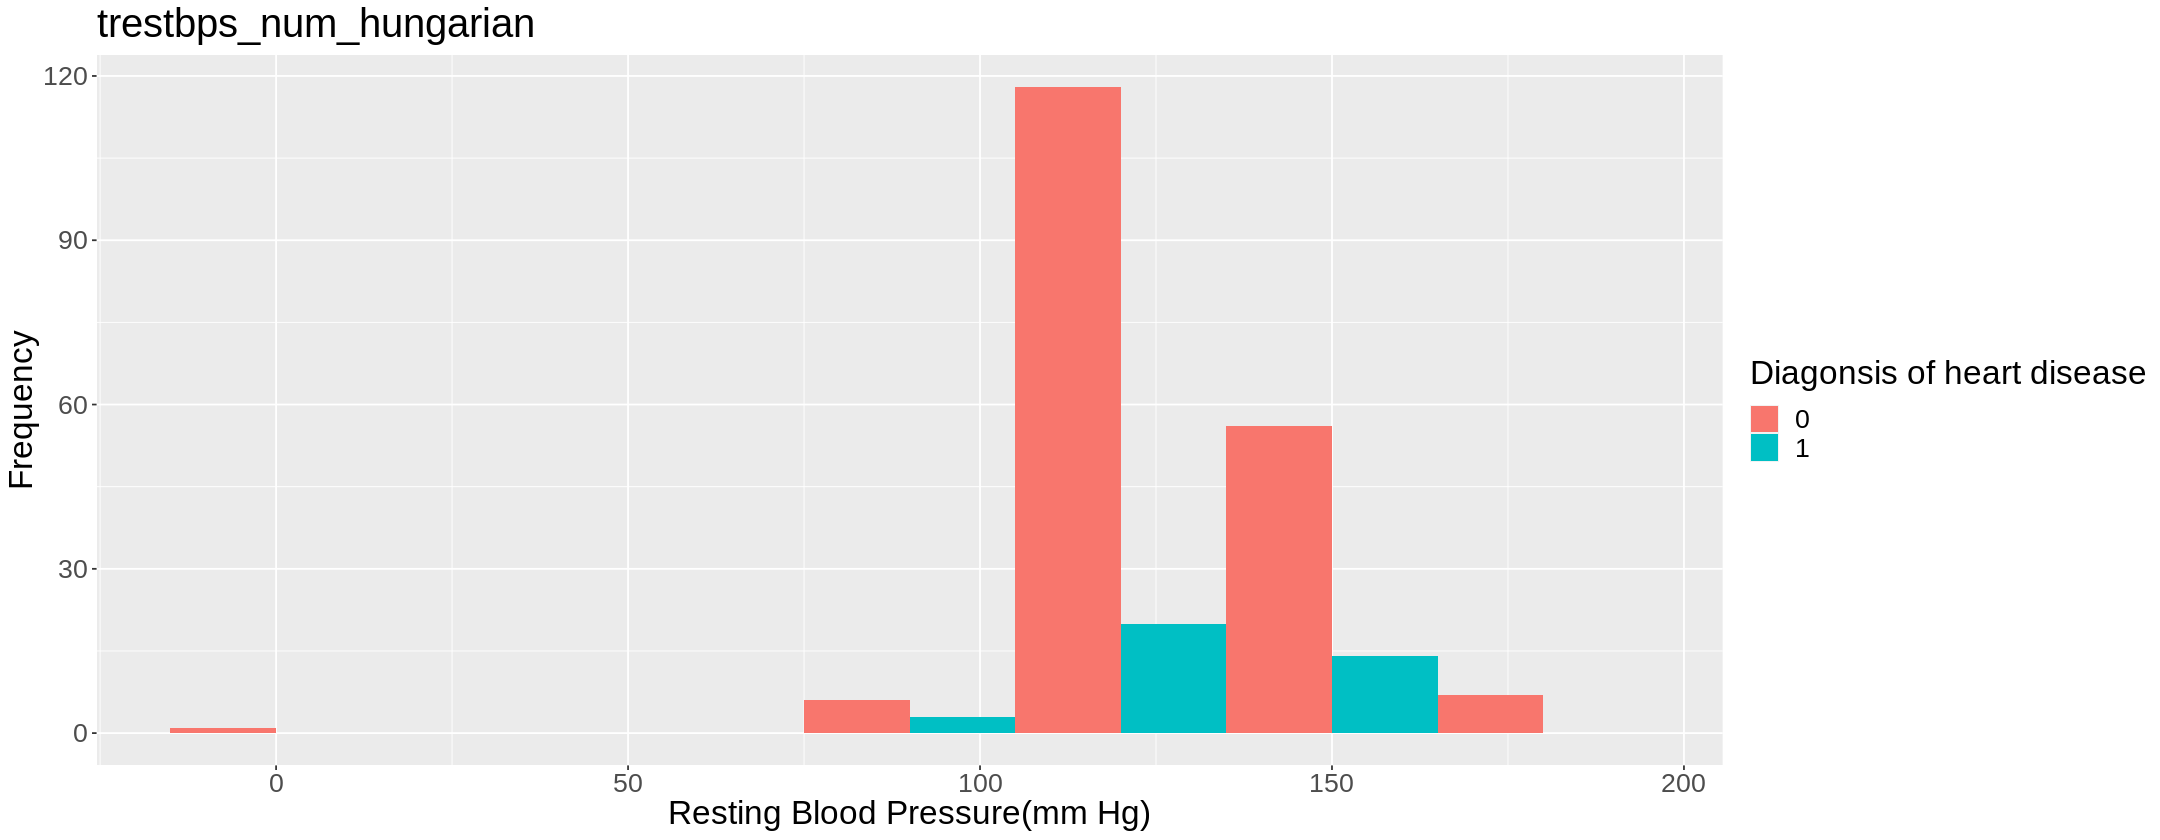

In [116]:
trestbps_num_cleveland<-cleaveland_mutate|>
ggplot(aes(x=trestbps,fill= num))+
geom_histogram(position="dodge",binwidth=30)+
labs(x="Resting Blood Pressure(mm Hg)",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("trestbps_num_cleaveland")+
theme(text=element_text(size=20))
trestbps_num_cleveland

trestbps_num_hungarian<-hungarian_mutate|>
ggplot(aes(x=trestbps,fill= num))+
geom_histogram(position="dodge",binwidth=30)+
labs(x="Resting Blood Pressure(mm Hg)",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("trestbps_num_hungarian")+
theme(text=element_text(size=20))
trestbps_num_hungarian

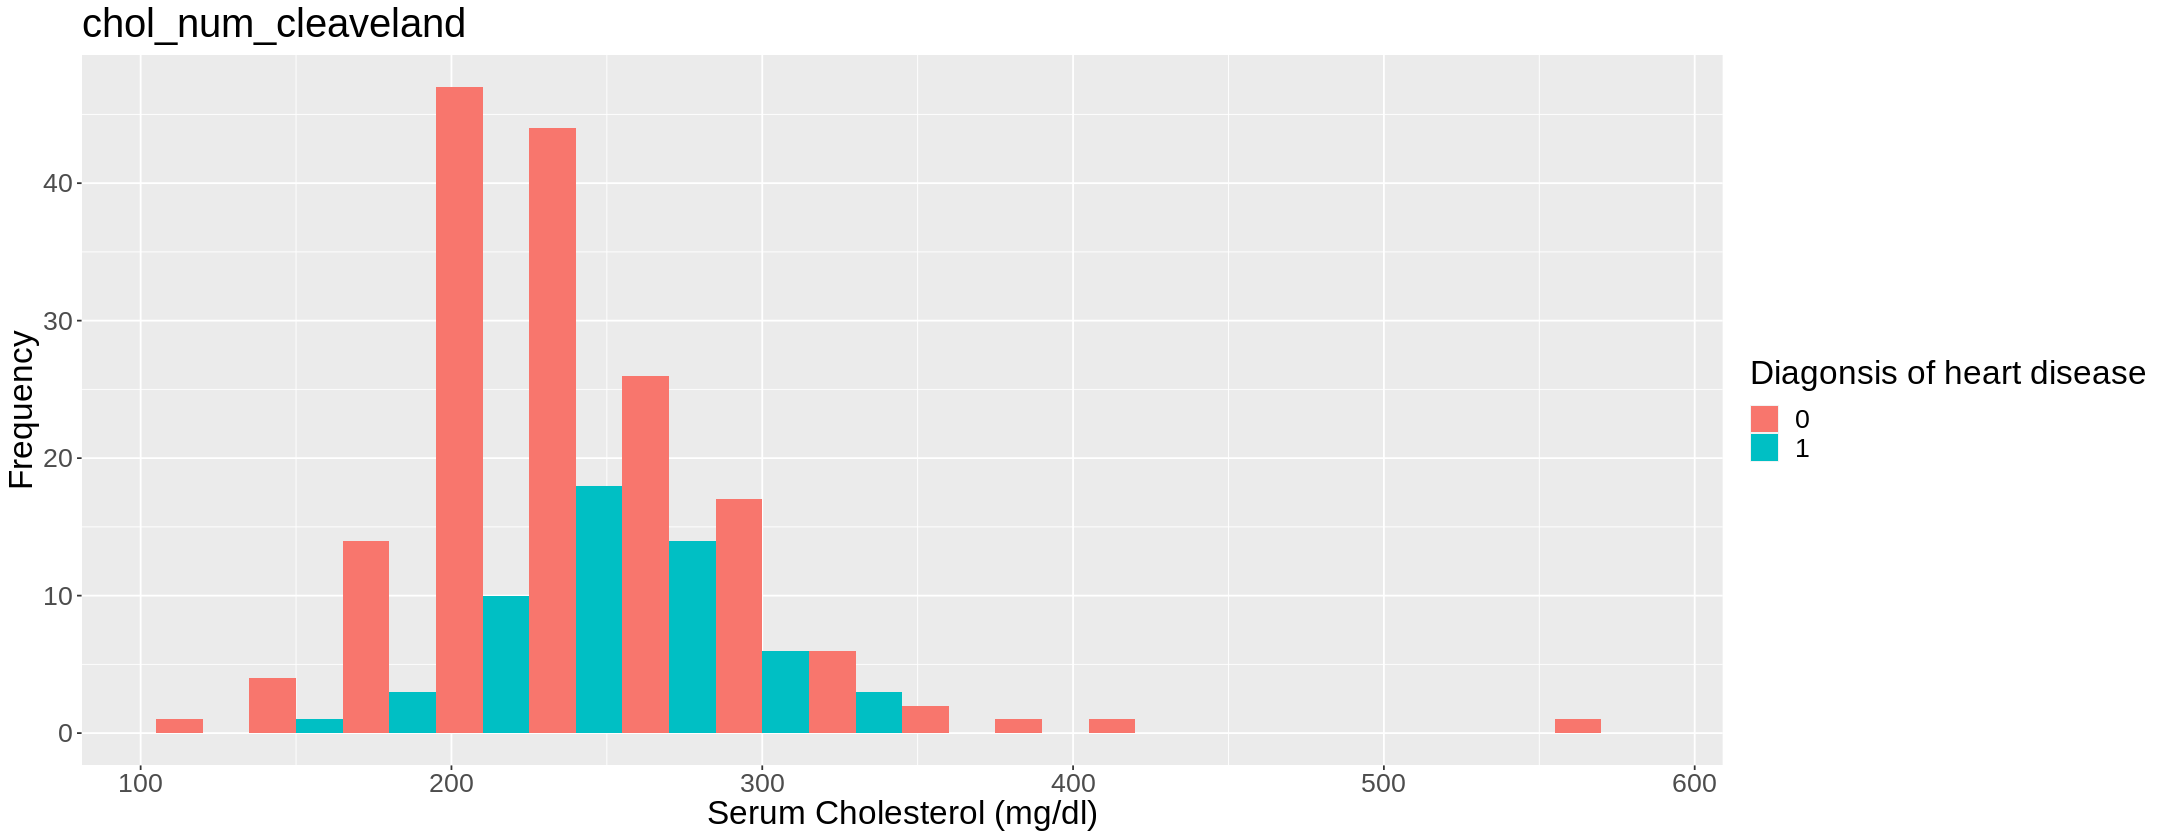

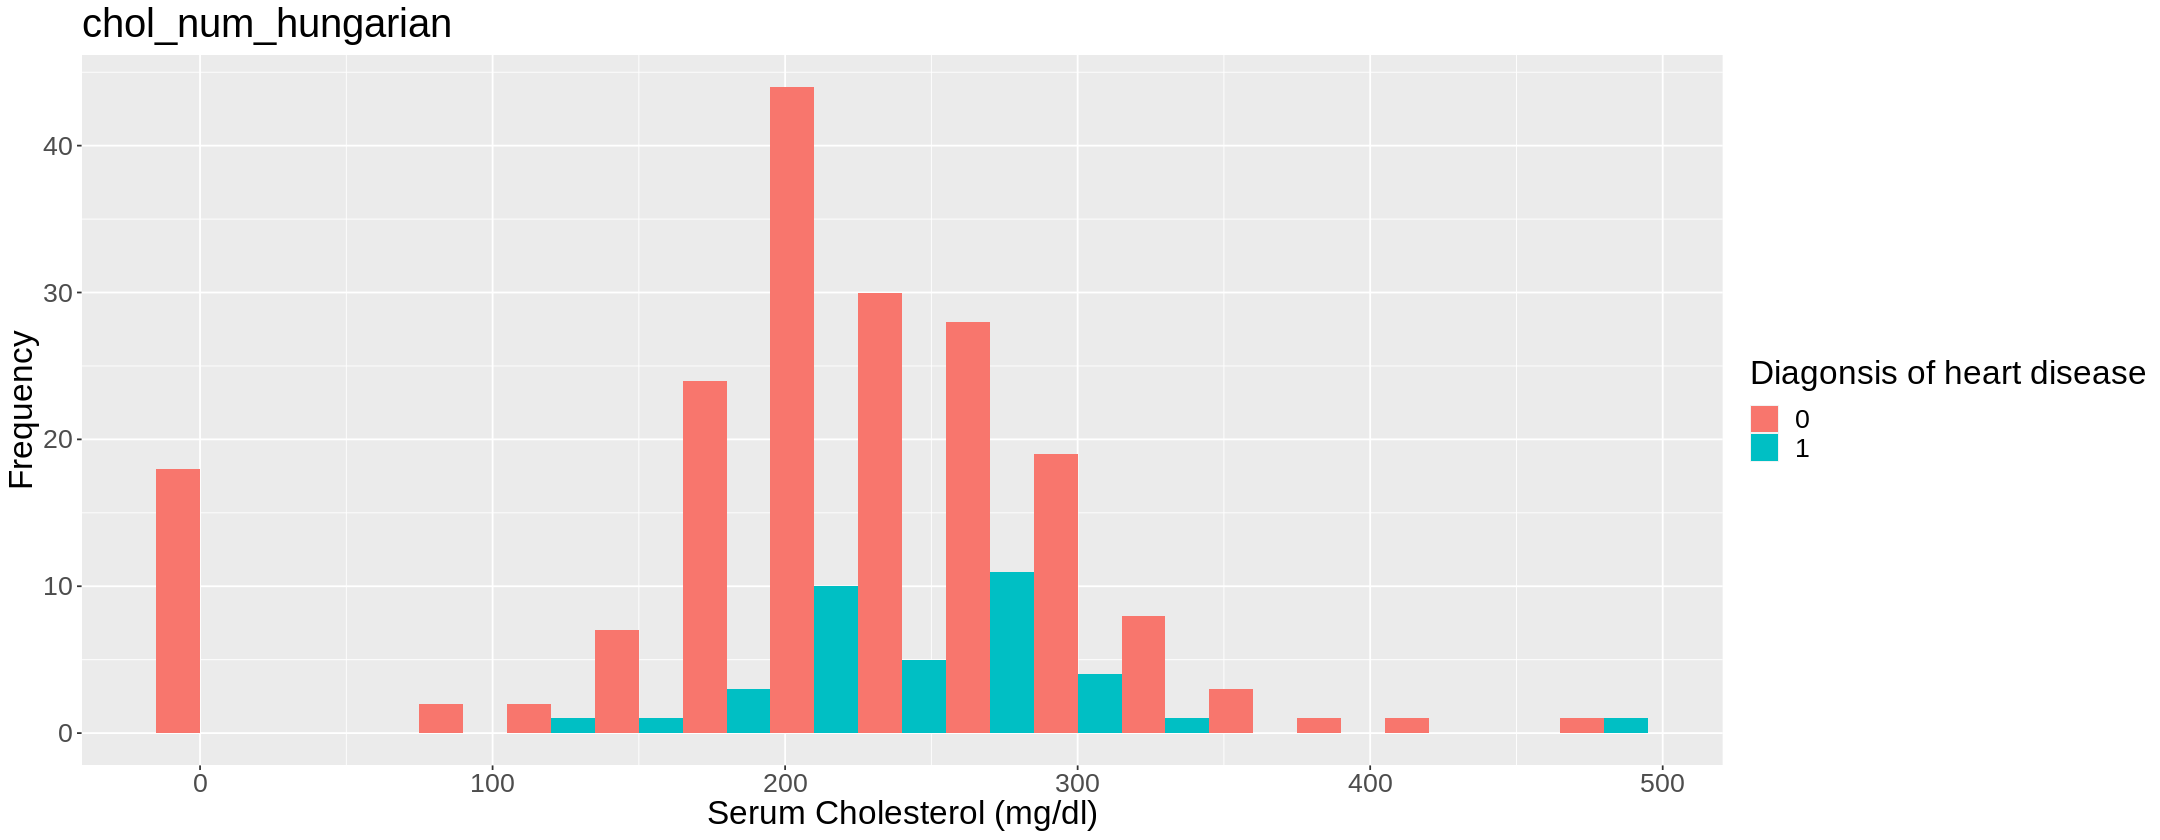

In [117]:
chol_num_cleveland<-cleaveland_mutate|>
ggplot(aes(x=chol,fill= num))+
geom_histogram(position="dodge",binwidth=30)+
labs(x="Serum Cholesterol (mg/dl)",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("chol_num_cleaveland")+
theme(text=element_text(size=20))
chol_num_cleveland

chol_num_hungarian<-hungarian_mutate|>
ggplot(aes(x=chol,fill= num))+
geom_histogram(position="dodge",binwidth=30)+
labs(x="Serum Cholesterol (mg/dl)",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("chol_num_hungarian")+
theme(text=element_text(size=20))
chol_num_hungarian

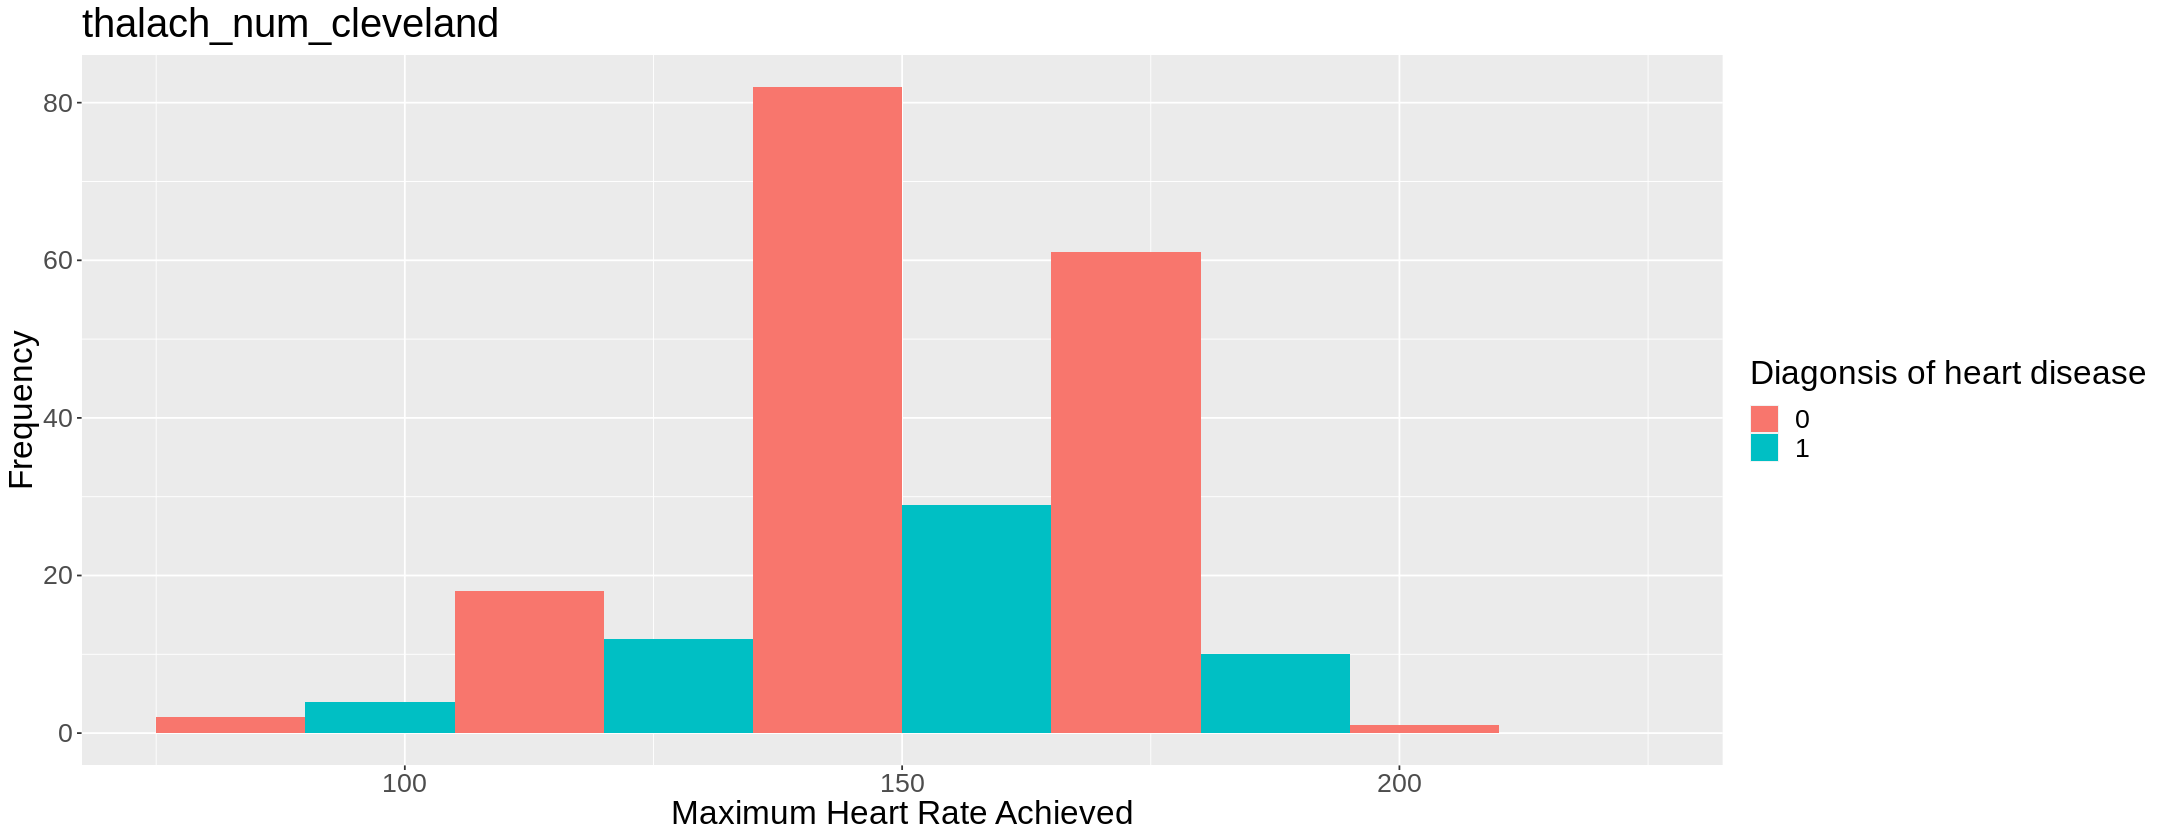

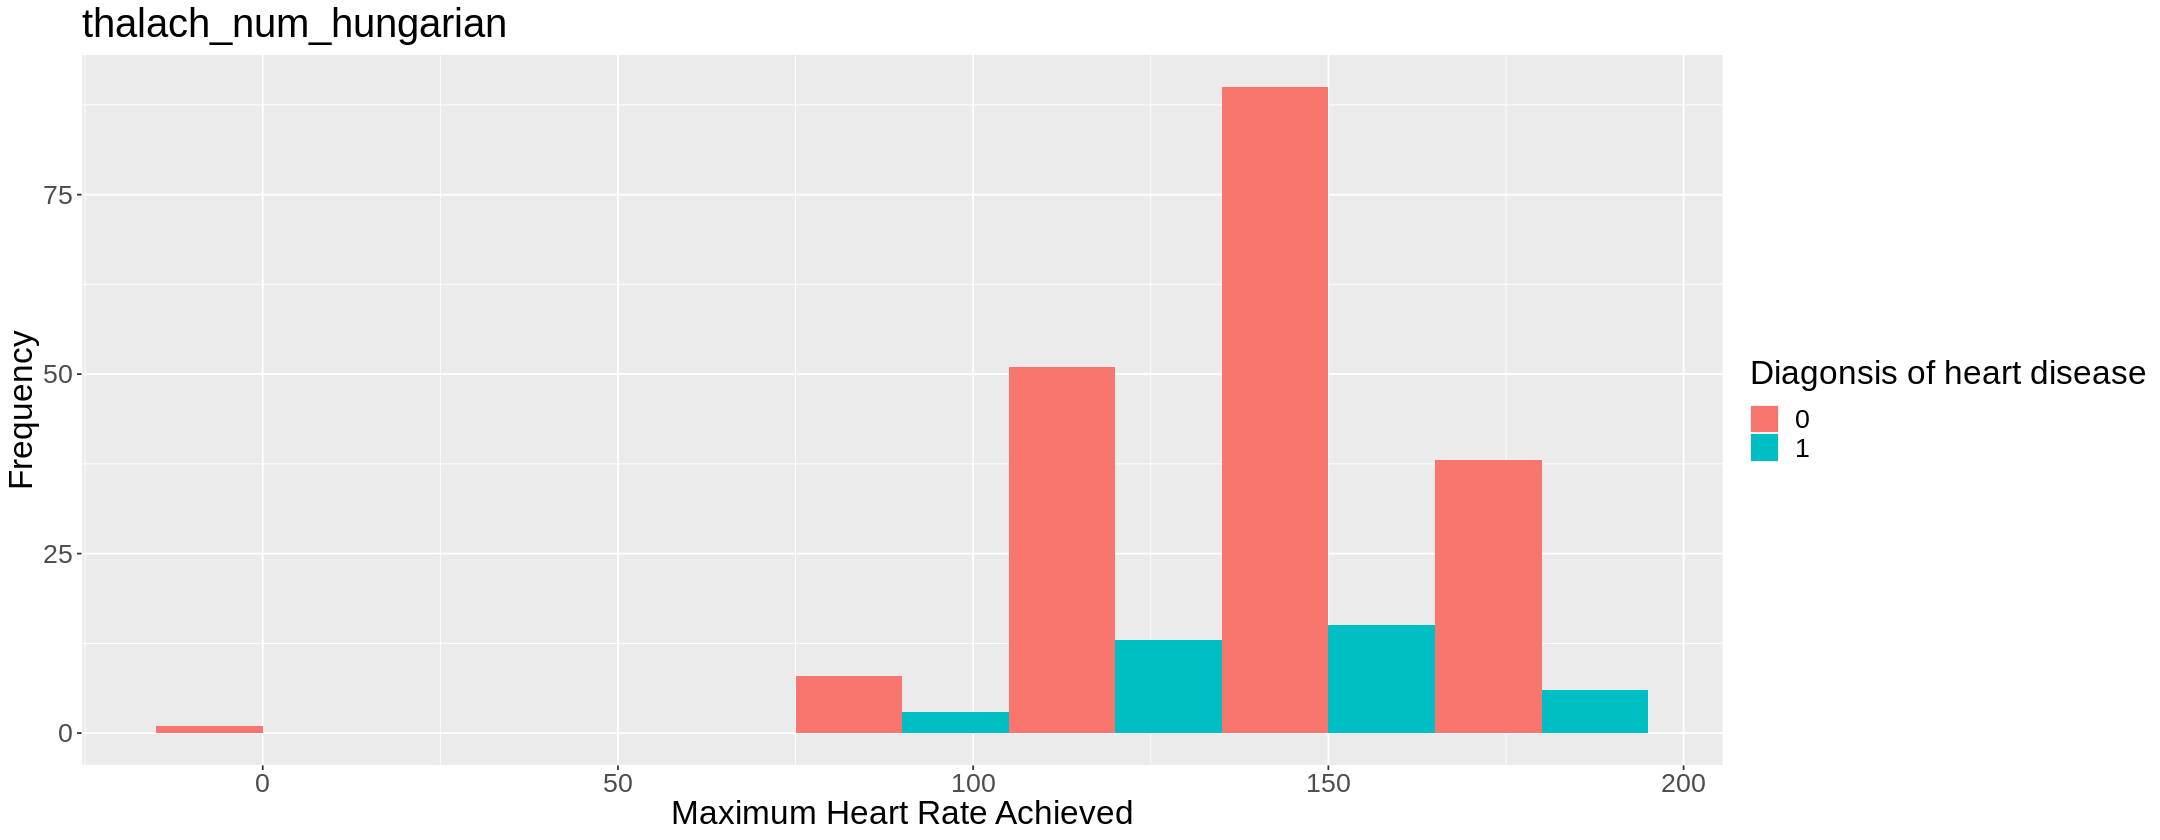

In [121]:
thalach_num_cleveland<-cleaveland_mutate|>
ggplot(aes(x=thalach,fill= num))+
geom_histogram(position="dodge",binwidth=30)+
labs(x="Maximum Heart Rate Achieved",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("thalach_num_cleveland")+
theme(text=element_text(size=20))
thalach_num_cleveland

thalach_num_hungarian<-hungarian_mutate|>
ggplot(aes(x=thalach,fill= num))+
geom_histogram(position="dodge",binwidth=30)+
labs(x="Maximum Heart Rate Achieved",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("thalach_num_hungarian")+
theme(text=element_text(size=20))
thalach_num_hungarian

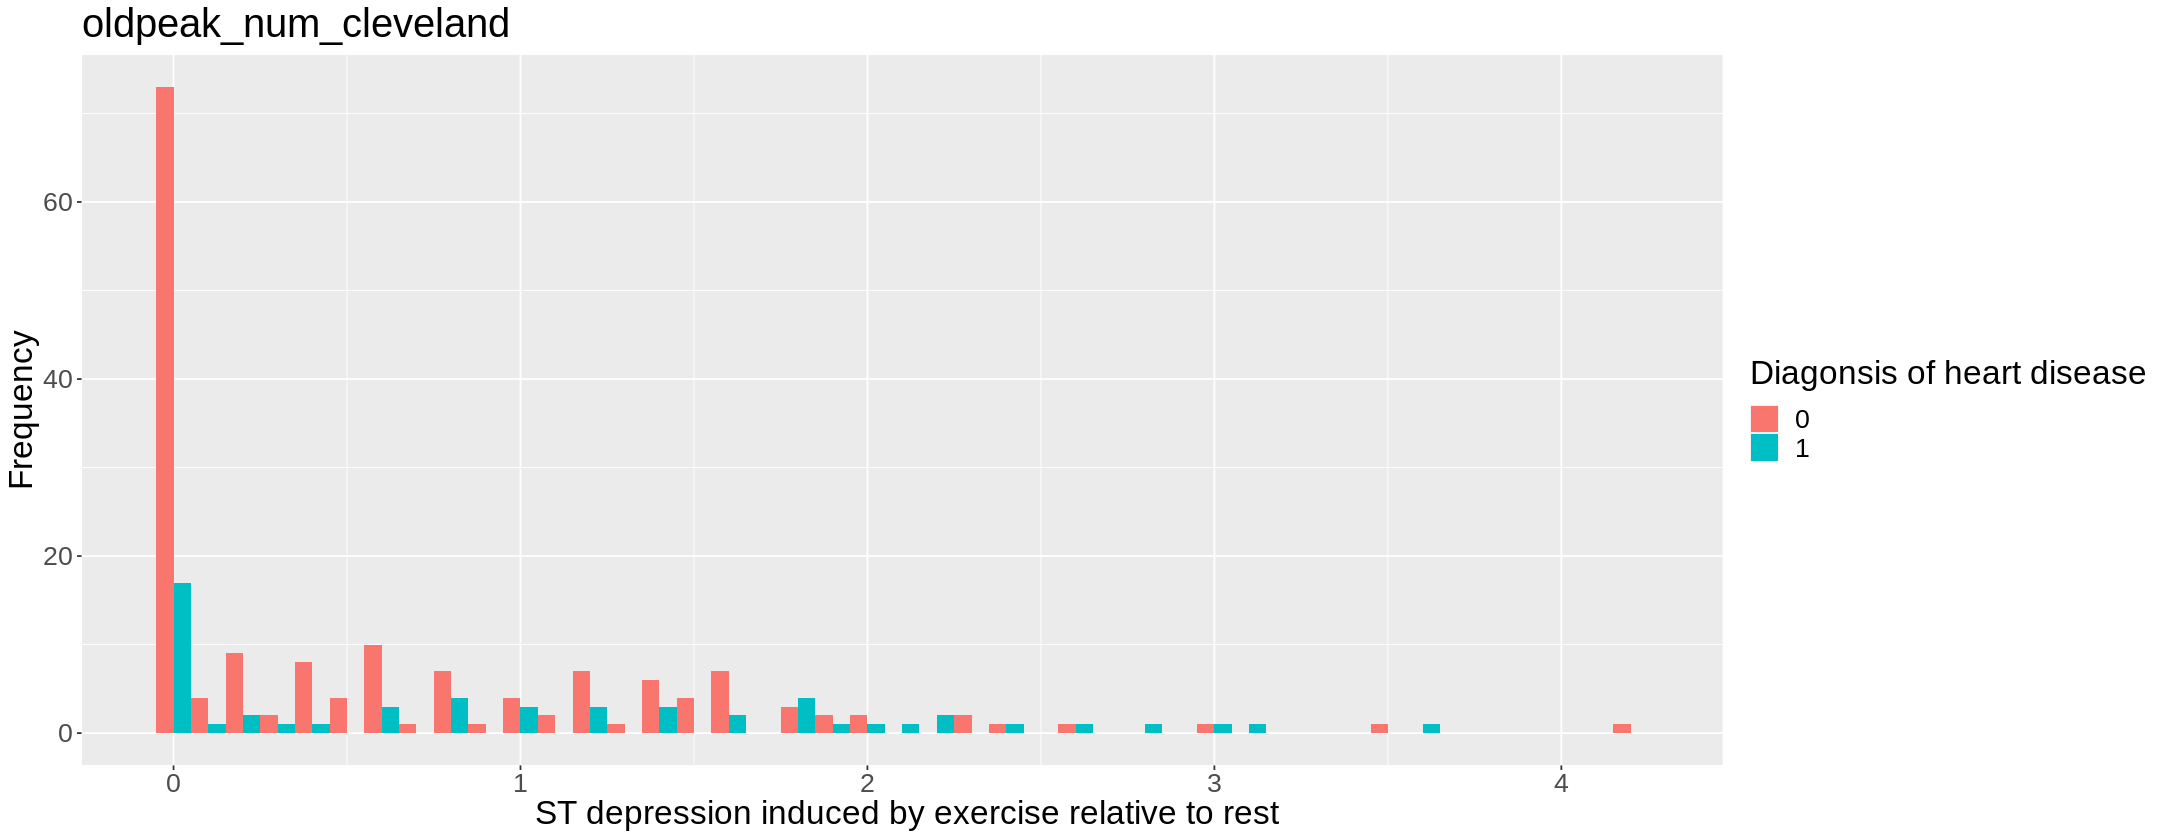

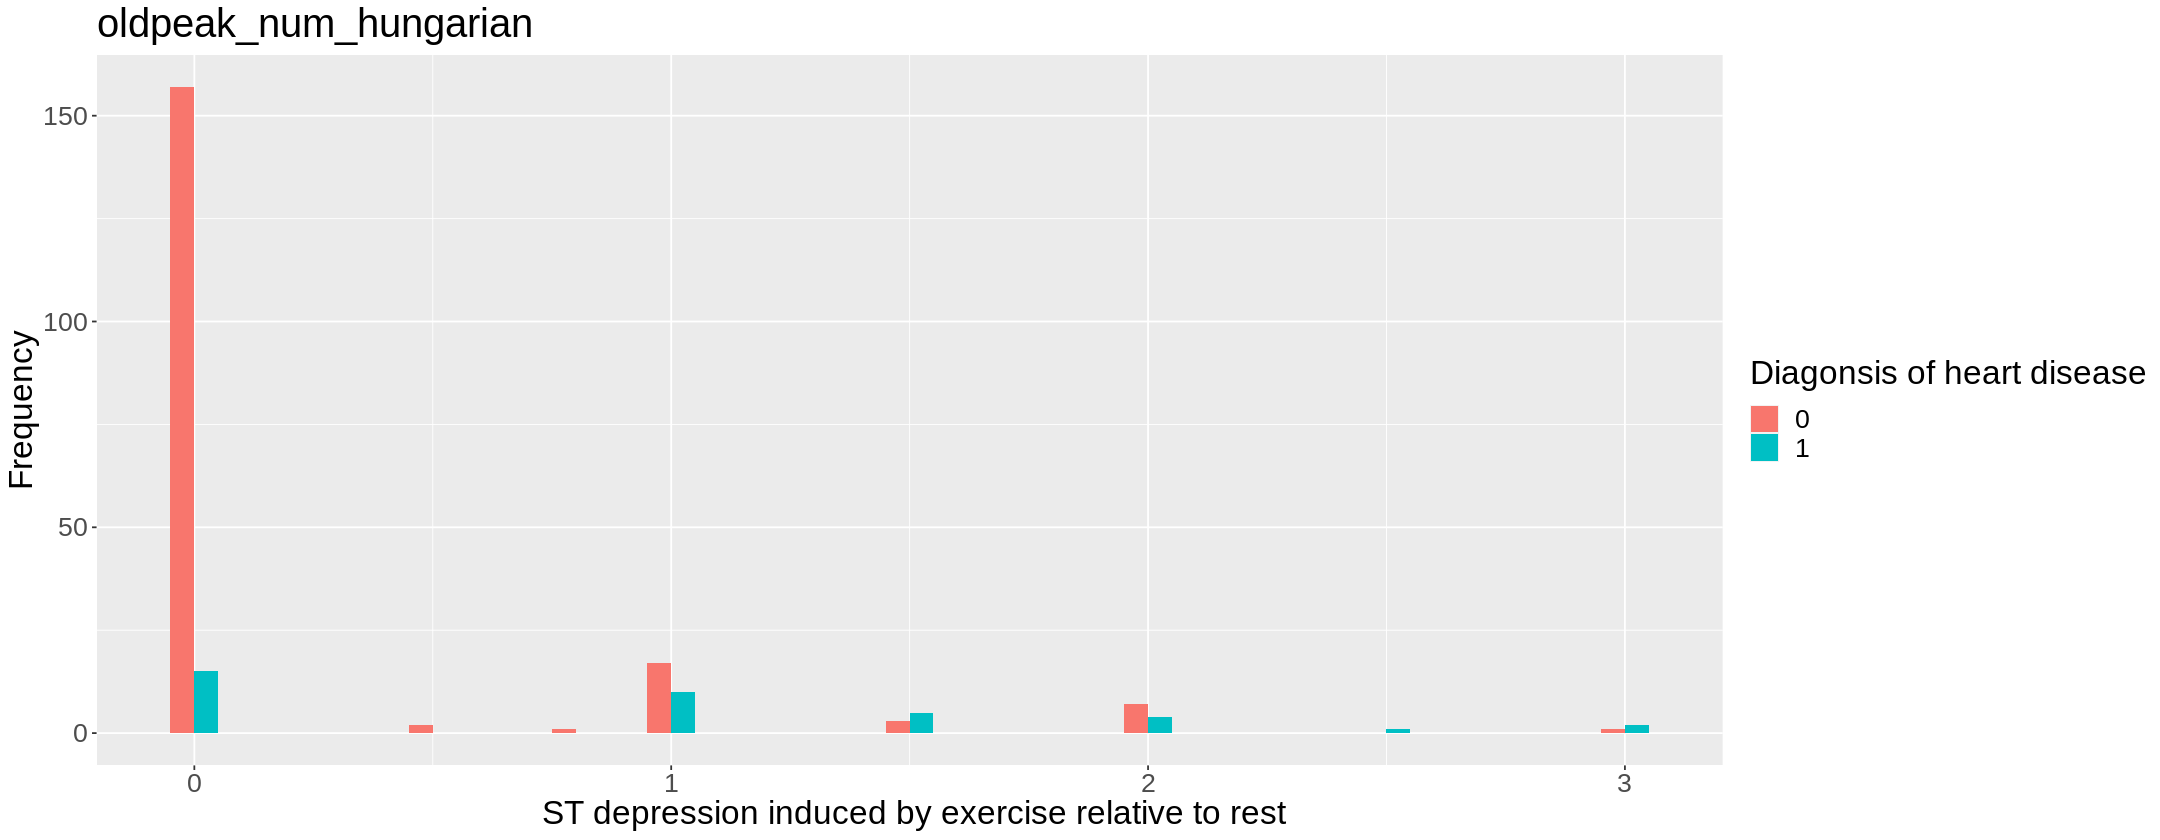

In [128]:
oldpeak_num_cleveland<-cleaveland_mutate|>
ggplot(aes(x=oldpeak,fill= num))+
geom_histogram(position="dodge",binwidth=0.1)+
labs(x=" ST depression induced by exercise relative to rest",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("oldpeak_num_cleveland")+
theme(text=element_text(size=20))
oldpeak_num_cleveland

oldpeak_num_hungarian<-hungarian_mutate|>
ggplot(aes(x=oldpeak,fill= num))+
geom_histogram(position="dodge",binwidth=0.1)+
labs(x=" ST depression induced by exercise relative to rest",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("oldpeak_num_hungarian")+
theme(text=element_text(size=20))
oldpeak_num_hungarian


"levels(cleaveland_mutate$num) <- c("No Heart Disease", "Heart Disease")  # changes 1,2,3 to alphabets
levels(cleaveland_mutate$thal) <- c("Normal", "Fixed Defect", "Reversaable Defect")
levels(cleaveland_mutate$slope) <- c("upsloping", "flat", "downsloping")
levels(cleaveland_mutate$exang) <- c("Yes", "No")
levels(cleaveland_mutate$restecg) <- c("Normal", "ST-T wave abnormality")
levels(cleaveland_mutate$fbs) <- c("true", "false")
levels(cleaveland_mutate$cp) <- c("typical angina", "atypical angina", "non-anginal pain", "aaasymptomatic")
levels(cleaveland_mutate$sex) <- c("Female", "Male")"


heart_split <- initial_split(cleaveland_mutate, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

knn_recipe <- recipe(num ~ age + trestbps + chol + thalach + oldpeak, data = heart_training)|>
step_scale(all_predictors())|>
step_center(all_predictors())



knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

heart_vfold <- vfold_cv(heart_training, v = 5, strata = num)

k_vals <- (tibble(neighbors=1:30))

knn_results <- workflow()|>
add_recipe(knn_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples = heart_vfold, grid = k_vals)|>
collect_metrics()
                 
                 
accuracies <- knn_results |>
                 filter(.metric == "accuracy")
                
accuracies
         

knn_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 18)|> set_engine("kknn")|> set_mode("classification")

knn_fit1 <- workflow()|> add_recipe(knn_recipe)|> add_model(knn_spec1)|> fit(data = heart_training)

heart_test_predictions <- predict(knn_fit1, heart_testing)|> bind_cols(heart_testing)

heart_test_predictions|> metrics(truth = num, estimate = .pred_class) |> filter(.metric =="accuracy")